# Ejercicio1 - Busqueda de Alojamiento en Airbnb (Jupyter).

Supongamos que somos un agente de [Airbnb](http://www.airbnb.com) localizado en Lisboa, y tenemos que atender peticiones de varios clientes. Tenemos un archivo llamado `airbnb.csv` (en la carpeta data) donde tenemos información de todos los alojamientos de Airbnb en Lisboa.

In [1]:
!pip install pandas

In [2]:
import pandas as pd
data = pd.read_csv("./data/airbnb.csv")

In [3]:
data.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


En concreto el dataset tiene las siguientes variables:
- room_id: el identificador de la propiedad
- host_id: el identificador del dueño de la propiedad
- room_type: tipo de propiedad (vivienda completa/(habitacion para compartir/habitación privada)
- neighborhood: el barrio de Lisboa
- reviews: El numero de opiniones
- overall_satisfaction: Puntuacion media del apartamento
- accommodates: El numero de personas que se pueden alojar en la propiedad
- bedrooms: El número de habitaciones
- price: El precio (en euros) por noche

## Ejercicios

### 1. Realizar Análisis Exploratorio de los datos

Sobre este apartado deberá explorar los datos como se vio en clase .. aplicar métodos shape, columns, etc

In [4]:

print("Dimensiones del DataFrame:", data.shape)
print("\nColumnas del DataFrame:", data.columns)
print("\nInformación del DataFrame:")
data.info()
print("\nDescripción estadística del DataFrame:")
print(data.describe())
print("\nPrimeras 5 filas del DataFrame:")
print(data.head())

Dimensiones del DataFrame: (13232, 9)

Columnas del DataFrame: Index(['room_id', 'host_id', 'room_type', 'neighborhood', 'reviews',
       'overall_satisfaction', 'accommodates', 'bedrooms', 'price'],
      dtype='object')

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13232 entries, 0 to 13231
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               13232 non-null  int64  
 1   host_id               13232 non-null  int64  
 2   room_type             13232 non-null  object 
 3   neighborhood          13232 non-null  object 
 4   reviews               13232 non-null  int64  
 5   overall_satisfaction  13222 non-null  float64
 6   accommodates          13232 non-null  int64  
 7   bedrooms              13232 non-null  float64
 8   price                 13232 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 930.5+ KB

Descripción est

### 2. Realizar Filtrados a Datos

- Realizar filtrados, según sea el caso. 


Nota: 
Para obtener el top de un conjunto de datos debemos aplicar un head(n) además de ordenar los datos

#### Caso 1.

Alicia va a ir a Lisboa durante una semana con su marido y sus 2 hijos. Están buscando un apartamento con habitaciones separadas para los padres y los hijos. No les importa donde alojarse o el precio, simplemente quieren tener una experiencia agradable. Esto significa que solo aceptan lugares con más de 10 críticas con una puntuación mayor de 4. Cuando seleccionemos habitaciones para Alicia, tenemos que asegurarnos de ordenar las habitaciones de mejor a peor puntuación. Para aquellas habitaciones que tienen la misma puntuación, debemos mostrar antes aquellas con más críticas. Debemos darle 3 alternativas.

In [5]:

filtered_data = data[(data['reviews'] > 10) & (data['overall_satisfaction'] > 4)]
sorted_data = filtered_data.sort_values(by=['overall_satisfaction', 'reviews'], ascending=[False, False])
top_3 = sorted_data.head(3)
top_3

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
120,176153,842219,Entire home/apt,Misericórdia,438,5.0,4,2.0,102.0
931,1085634,5968047,Entire home/apt,Misericórdia,379,5.0,2,1.0,52.0
212,299321,199452,Entire home/apt,Santo António,337,5.0,2,1.0,87.0


#### Caso 2

Roberto es un casero que tiene una casa en Airbnb. De vez en cuando nos llama preguntando sobre cuales son las críticas de su alojamiento. Hoy está particularmente enfadado, ya que su hermana Clara ha puesto una casa en Airbnb y Roberto quiere asegurarse de que su casa tiene más críticas que las de Clara. Tenemos que crear un dataframe con las propiedades de ambos. Las id de las casas de Roberto y Clara son 97503 y 90387  respectivamente. Finalmente guardamos este dataframe como excel llamado "roberto.xls

Se instaló la extensión pip install openpyxl

In [6]:

roberto_clara_df = data[data['room_id'].isin([97503, 90387])]
roberto_clara_df.to_excel('roberto.xlsx', index=False)
roberto_clara_df

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
41,90387,490050,Private room,Santo António,204,5.0,2,1.0,46.0
48,97503,515924,Private room,Santo António,39,4.0,2,1.0,26.0



#### Caso 3

Diana va a Lisboa a pasar 3 noches y quiere conocer a gente nueva. Tiene un presupuesto de 50€ para su alojamiento. Debemos buscarle las 10 propiedades más baratas, dandole preferencia a aquellas que sean habitaciones compartidas *(room_type == Shared room)*, y para aquellas viviendas compartidas debemos elegir aquellas con mejor puntuación.

In [7]:

filtered_data = data[data['price'] <= 50]
shared_rooms = filtered_data[filtered_data['room_type'] == 'Shared room'].sort_values(by='overall_satisfaction', ascending=False)
other_rooms = filtered_data[filtered_data['room_type'] != 'Shared room'].sort_values(by='price', ascending=True)
final_selection = pd.concat([shared_rooms, other_rooms]).head(10)
final_selection

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
3663,5725814,29676067,Shared room,Misericórdia,23,5.0,6,1.0,21.0
3727,5803348,29676067,Shared room,Misericórdia,19,5.0,9,1.0,20.0
1656,2382263,11481927,Shared room,São Vicente,4,5.0,6,1.0,31.0
6459,11427995,32344156,Shared room,Misericórdia,21,5.0,8,1.0,18.0
6527,11523225,58899339,Shared room,Avenidas Novas,4,5.0,9,1.0,23.0
11058,17497074,25913998,Shared room,Arroios,7,5.0,1,1.0,18.0
10722,17096373,107813252,Shared room,Areeiro,13,5.0,1,1.0,20.0
10723,17096560,107813252,Shared room,Areeiro,5,5.0,1,1.0,16.0
8918,14719962,40574313,Shared room,Avenidas Novas,4,5.0,4,1.0,13.0
9065,14933182,91501272,Shared room,Santo António,5,5.0,8,1.0,11.0


### 3. Realizar Agrupamientos de Datos


- Según su criterio, aplicar 2 tipos de agrupamientos a los datos brindados. 
- **Opcional**, averiguar como realizar el gráfico de los 2 agrupamientos de los datos realizados. Se podría emplear librerias como mathplot y searbon ... ayudarse de chatgtp, etc


/tmp/ipykernel_6680/1880638137.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='neighborhood', y='price', data=grouped_by_neighborhood_sorted, palette='viridis')


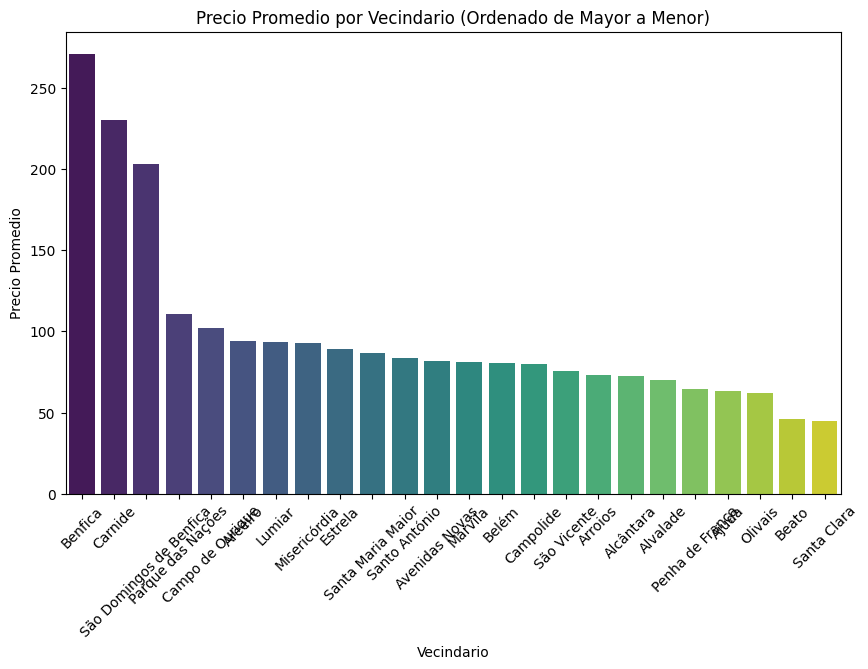

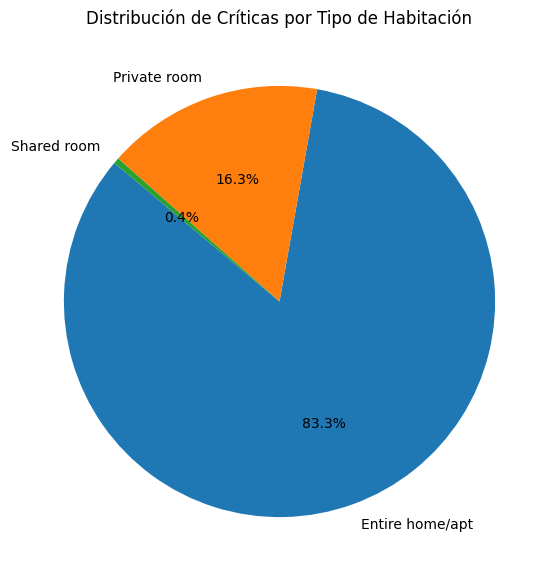

In [8]:

grouped_by_neighborhood = data.groupby('neighborhood')['price'].mean().reset_index()
grouped_by_neighborhood

grouped_by_room_type = data.groupby('room_type')['reviews'].sum().reset_index()

grouped_by_room_type

import matplotlib.pyplot as plt
import seaborn as sns

grouped_by_neighborhood_sorted = grouped_by_neighborhood.sort_values(by='price', ascending=False)

plt.figure(figsize=(10,6))

sns.barplot(x='neighborhood', y='price', data=grouped_by_neighborhood_sorted, palette='viridis')

plt.title('Precio Promedio por Vecindario (Ordenado de Mayor a Menor)')
plt.xticks(rotation=45)
plt.ylabel('Precio Promedio')
plt.xlabel('Vecindario')

plt.show()



plt.figure(figsize=(7,7))

plt.pie(grouped_by_room_type['reviews'], labels=grouped_by_room_type['room_type'], autopct='%1.1f%%', startangle=140)


plt.title('Distribución de Críticas por Tipo de Habitación')


plt.show()